In [1]:
# -*- coding: UTF-8 -*-
#%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [2]:
from __future__ import division
from os import path
import numpy as np
import pandas as pd
import csv
from sklearn.model_selection import StratifiedShuffleSplit
from time import time
from matplotlib import pyplot as plt
import seaborn as sns
from mylibs.jupyter_notebook_helper import show_graph
from tensorflow.contrib import rnn
from tensorflow.contrib import learn
import shutil
from tensorflow.contrib.learn.python.learn import learn_runner
from IPython.display import Image
from IPython.core.display import HTML
from mylibs.tf_helper import getDefaultGPUconfig
from sklearn.metrics import r2_score
from mylibs.py_helper import factors
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
from statsmodels.tsa.stattools import coint
from data_providers.price_history_sliding_window_data_provider \
    import PriceHistorySlidingWindowDataProvider
from sklearn.linear_model import LinearRegression
from scipy.signal import detrend
from os.path import isdir

/home/student/anaconda2/envs/dis/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
mobiles = '../mobiles_02_no_outliers.csv'

In [4]:
mobdf = pd.read_csv(mobiles, index_col=0, quoting=csv.QUOTE_ALL, encoding='utf-8')

In [5]:
mobskus = mobdf.index
mobskus.shape

(781,)

In [6]:
phs = '../price_history_01_no_spikes.csv'

In [7]:
phdf = pd.read_csv(phs, index_col=0, quoting=csv.QUOTE_ALL, encoding='utf-8')

In [8]:
phskus = phdf.index
phskus.shape

(837,)

In [9]:
only_in_ph = set(phskus).difference(mobskus)
len(only_in_ph)

56

In [10]:
only_in_mobs = set(mobskus).difference(phskus)
len(only_in_mobs)

0

In [11]:
ph_filtered = phdf.loc[mobskus]
ph_filtered.shape

(781, 684)

In [12]:
data_dir = '../../../../Dropbox/data/'
assert isdir(data_dir)

In [13]:
ph_filtered_path = data_dir + '/price_hist_df' + '/price_history_01_no_spikes_no_outliers.csv'

In [14]:
#uncomment to save
ph_filtered.to_csv(ph_filtered_path, quoting=csv.QUOTE_ALL, encoding='utf-8')

In [15]:
from price_history import PriceHistory

In [16]:
ph = PriceHistory(ph_filtered_path)

In [17]:
seqs = ph.extractAllSequences()

In [26]:
np.sum(ph_filtered['sequence_length'] < 90)

125

In [28]:
small_lengths = ph_filtered[ph_filtered['sequence_length'] < 90]['sequence_length']
small_lengths.shape

(125,)

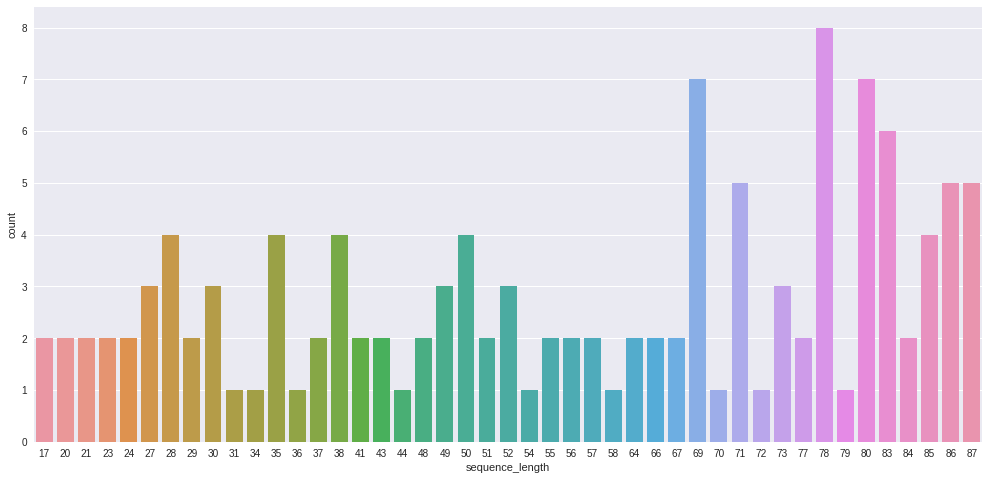

In [34]:
plt.figure(figsize=(17,8))
sns.countplot(small_lengths.astype(np.int))
plt.show()

In [47]:
seq.name

10084353

In [42]:
seq = seqs[0]

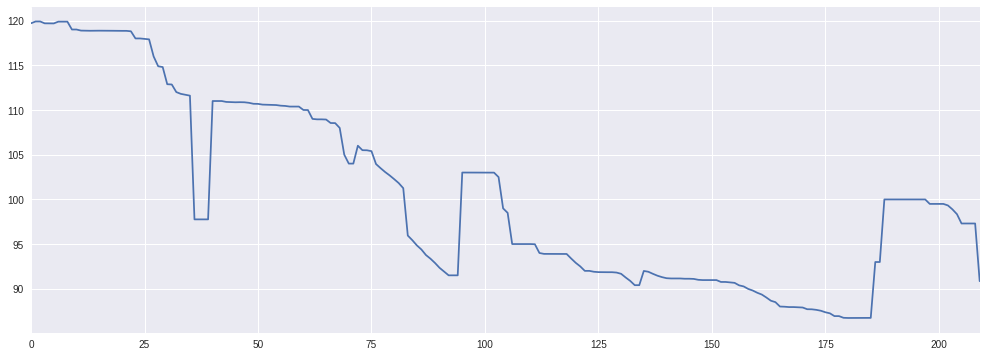

In [48]:
plt.figure(figsize=(17, 6))
sns.tsplot(seq)
plt.show()

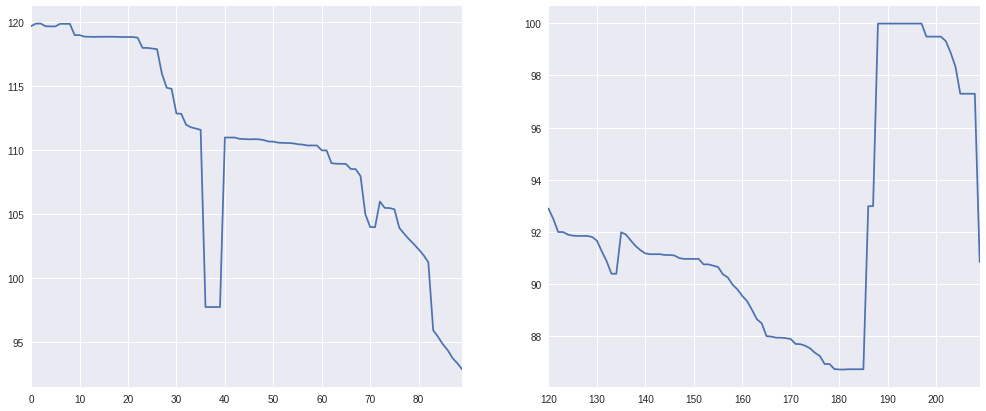

In [66]:
figs, axes = plt.subplots(1, 2, figsize=(17,7))
sns.tsplot(seq[:90], ax=axes[0])
#axes[0].set_title('aaa')
sns.tsplot(seq[-90:], ax=axes[1], time=range(210-90, 210))
plt.show()